# Work assignment SW09 - PYTHON BASICS

These are the self-study tasks of the semester week, which you will solve within one week in your JupyterHub environment. After completing your work, download a copy of the Jupyter notebook file locally to your laptop (Menu: File->Download).

On ILIAS you will find the weekly scheduled assignment where you will upload your solved Jupyter notebook file. After your submission, you will receive a corresponding sample solution to the assignment. Your submission will not be corrected. Although the assignments are marked “mandatory”, they do not count towards your semester grades. Only the grades of the tests during the semester are relevant for this. 

We wish you every success!


---
---
## Exercise 1
Significant digits and decimal places

---
a) Determine the number of significant digits and the number of decimal places of the measured value:

- $3.709 \mskip3mu kg$
- $0.37090 \mskip3mu g$
- $1.2 \cdot 10^3 \mskip3mu dm^2$
- $1200 \mskip3mu dm^2$

### Solution

In [68]:
def digits(n):
    if type(n) == float:
        dot = str(n).find(".")
        before_dot = str(n)[:dot]
        after_dot = str(n)[dot+1:]
        
        if int(before_dot) == 0:
            if len(before_dot) > 0 and before_dot[-1] == '0':
                num_digits = len(after_dot)+1
                return num_digits
            else:
                num_digits = len(after_dot)
                return num_digits
        else:
            num_digits = len(before_dot) + len(after_dot)
            return num_digits
    else:
        return len(str(n))
    
print(digits(3.709))
print(digits(0.37090))
print(digits(1.2))
print(digits(1200))

4
5
2
4


---
---
## Task 2

Accuracy of a calculation result

You have two measured values, $m_1 = 130.2 \mskip3mu g$ and $m_2 = 92.56 \mskip3mu kg$.

a) Which of the two values has the higher *relative* accuracy?

b) Which of the two values has the higher *absolute* accuracy?

c) Determine the result of the calculations $\frac{m_1}{m_2}$ and $m_1+m_2$ to a reasonable number of digits.

### Solution

In [69]:
import numpy as np

"""
To be honest, what the f**k is a relative and absolute accuracy?
"""

m_1,m_2 = 130.2,925600

def rel_acc(value):
    relative_accuracy = 1/10**digits(value)
    return relative_accuracy

rel_1,rel_2 = rel_acc(m_1), rel_acc(m_2)

if rel_1 < rel_2:
    rel = rel_1
    m = m_1

else:
    rel = rel_2
    m = m_2

print(f"The most relative accurate is {m} with {rel*100:.5f}% as accuracy")

The most relative accurate is 925600 with 0.00010% as accuracy


---
---
## Exercise 3

Read in a data file and display and evaluate the values using [pandas](https://pandas.pydata.org/).

---
a) Read in the data file [`data.txt`](data.txt) and output the labels of the columns.

### Solution:

In [70]:
import pandas as pd

df = pd.read_csv("data.txt", delimiter="\t")
print(df)

       n     x        y0        y1        y2
0      0 -5.00 -3.397320 -2.040274 -0.542143
1      1 -4.95 -3.946340 -2.075358 -1.327252
2      2 -4.90 -3.158201 -0.290995  1.070306
3      3 -4.85 -3.279361 -3.584018 -1.929530
4      4 -4.80 -3.349419 -5.420562  1.198207
..   ...   ...       ...       ...       ...
196  196  4.80  3.056953 -3.758519  1.215855
197  197  4.85  3.573920  1.751444 -1.340130
198  198  4.90  3.888522  3.076009  0.972900
199  199  4.95  3.307981 -1.676777 -1.283877
200  200  5.00  3.545136 -0.628782  0.188696

[201 rows x 5 columns]


- `n` denotes the index of the respective value
- `x` are the x-values
- `y0,y1,y2` are three different measurement series


---
b) Determine the mean value, the standard deviation, the median, the upper and lower quartile and the quartile difference for each of the three measurement series.

### Solution:

In [71]:
mean_y0 = df["y0"].mean()
mean_y1 = df["y1"].mean()
mean_y2 = df["y2"].mean()

print(f"Mean of\ny0: {mean_y0:.3f}\ny1: {mean_y1:.3f}\ny2: {mean_y2:.3f}\n")

sdt_y0 = df["y0"].std()
sdt_y1 = df["y1"].std()
sdt_y2 = df["y2"].std()

print(f"Standard deviation of\ny0: ±{sdt_y0:.3f}\ny1: ±{sdt_y1:.3f}\ny2: ±{sdt_y2:.3f}\n")

median_y0 = df["y0"].median()
median_y1 = df["y1"].median()
median_y2 = df["y2"].median()

print(f"Median of\ny0: {median_y0:.3f}\ny1: {median_y1:.3f}\ny2: {median_y2:.3f}\n")

quantile_y0 = df["y0"].quantile(q=[.75,.25])
quantile_y1 = df["y1"].quantile(q=[.75,.25])
quantile_y2 = df["y2"].quantile(q=[.75,.25])

print(f"Upper and lower quartiles of\n\ny0: {quantile_y0}\n\ny1:\n{quantile_y1}\n\ny2:\n{quantile_y2}")

Mean of
y0: -0.130
y1: -1.464
y2: -0.183

Standard deviation of
y0: ±2.054
y1: ±2.626
y2: ±4.115

Median of
y0: -0.140
y1: -1.435
y2: -0.542

Upper and lower quartiles of

y0: 0.75    1.559855
0.25   -1.855045
Name: y0, dtype: float64

y1:
0.75    0.130800
0.25   -3.025903
Name: y1, dtype: float64

y2:
0.75    4.177558
0.25   -4.321351
Name: y2, dtype: float64


---
c) Now create a graph with the corresponding histogram for each of the measurement series `y0, y1, y2`.

### Solution:

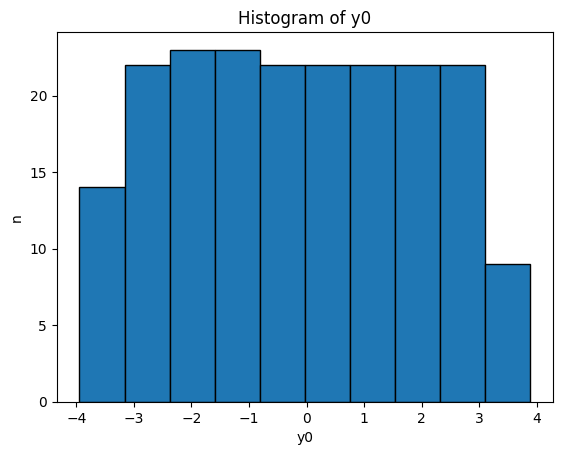

In [101]:
import matplotlib.pyplot as plt

df["y0"].plot(kind="hist", edgecolor="black")

plt.title("Histogram of y0")
plt.xlabel("y0")
plt.ylabel("n")

plt.show()

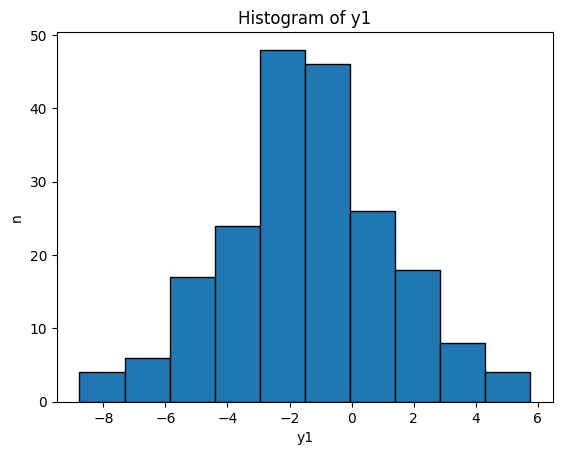

In [73]:
df["y1"].plot(kind="hist", edgecolor="black")

plt.title("Histogram of y1")
plt.xlabel("y1")
plt.ylabel("n")

plt.show()

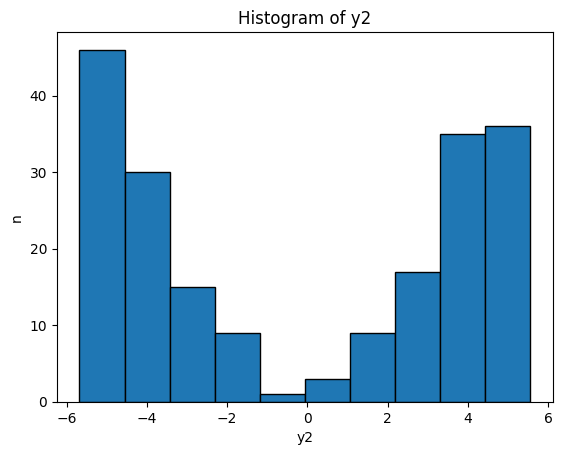

In [74]:
df["y2"].plot(kind="hist", edgecolor="black")

plt.title("Histogram of y2")
plt.xlabel("y2")
plt.ylabel("n")

plt.show()

---
d) Now create a graph with the corresponding cumulative histogram for each of the measurement series `y0, y1, y2`.

### Solution:

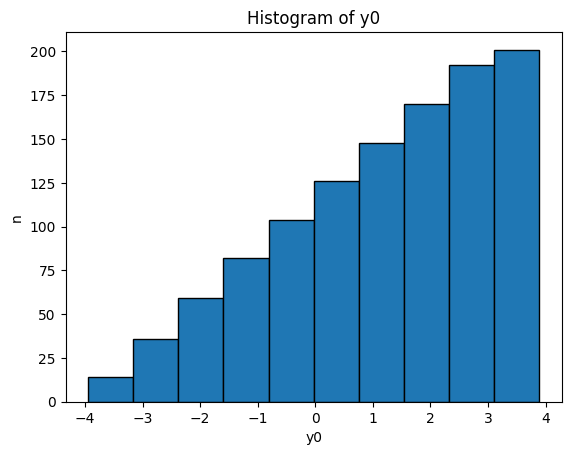

In [100]:
df["y0"].plot(kind="hist", cumulative=True, edgecolor="black")

plt.title("Histogram of y0")
plt.xlabel("y0")
plt.ylabel("n")

plt.show()

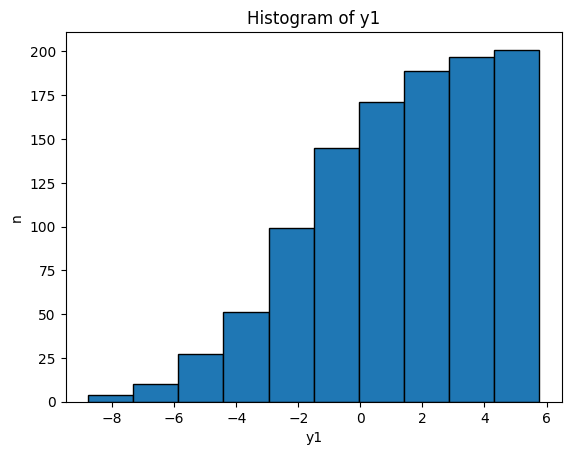

In [76]:
df["y1"].plot(kind="hist", cumulative=True, edgecolor="black")

plt.title("Histogram of y1")
plt.xlabel("y1")
plt.ylabel("n")

plt.show()

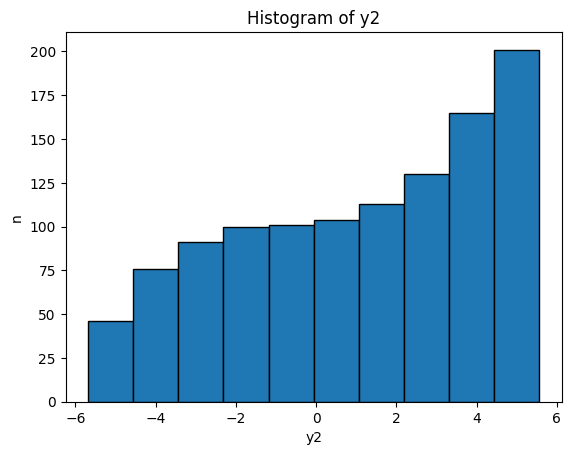

In [99]:
df["y2"].plot(kind="hist", cumulative=True, edgecolor="black")

plt.title("Histogram of y2")
plt.xlabel("y2")
plt.ylabel("n")

plt.show()

---
e) Now create a boxplot with all three measurement series `y0, y1, y2`.

### Solution:

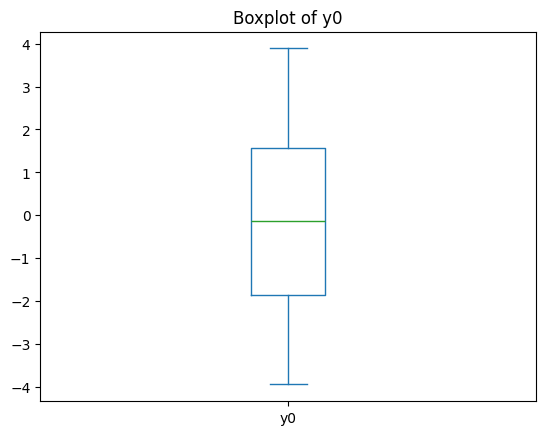

In [78]:
df["y0"].plot(kind="box", title="Boxplot of y0")

plt.show()

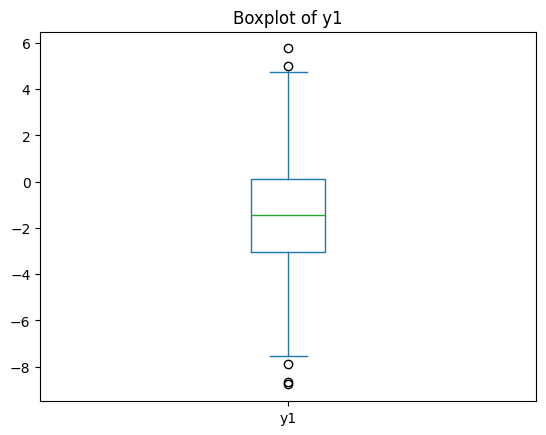

In [79]:
df["y1"].plot(kind="box", title="Boxplot of y1")

plt.show()

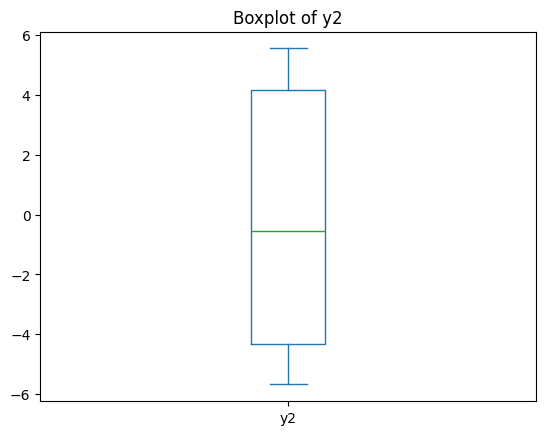

In [80]:
df["y2"].plot(kind="box", title="Boxplot of y2")

plt.show()

---
f) Create a scatter plot for all three measurement series `y0, y1, y2` - `y` over `x`.

### Solution:

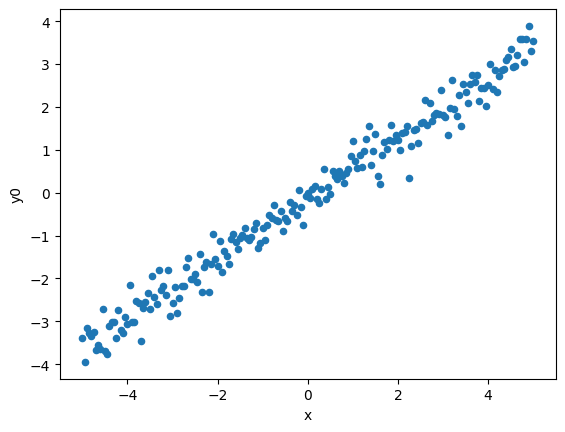

In [94]:
dataframe_y0 = df[["x", "y0"]]

dataframe_y0.plot(kind="scatter", x="x", y="y0")
plt.show()

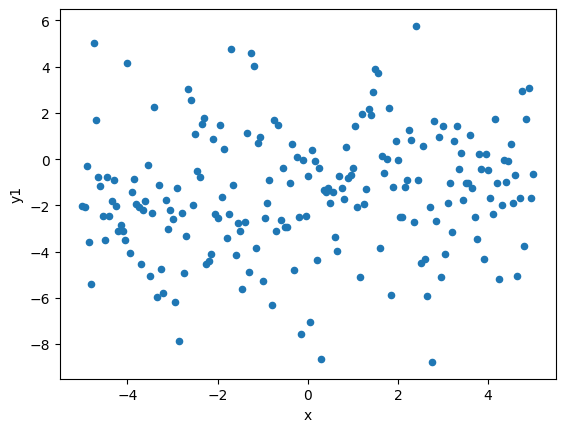

In [95]:
dataframe_y0 = df[["x", "y1"]]

dataframe_y0.plot(kind="scatter", x="x", y="y1")
plt.show()

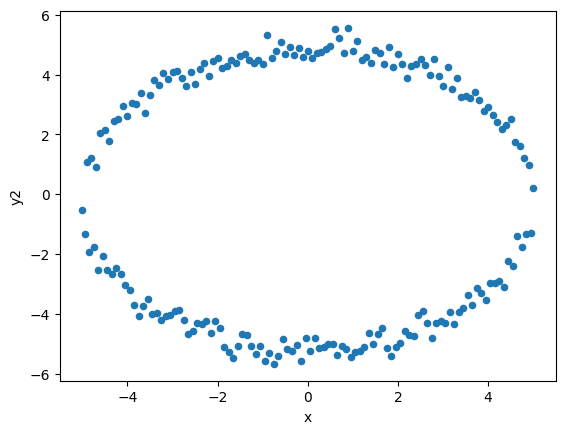

In [96]:
dataframe_y0 = df[["x", "y2"]]

dataframe_y0.plot(kind="scatter", x="x", y="y2")
plt.show()

---
g) Now determine the correlation coefficient between `x` and all three measurement series `y0, y1, y2`.

### Solution:

In [102]:
print(df.corr().loc["x", ["y0","y1","y2"]])

y0    0.988892
y1    0.131123
y2    0.008452
Name: x, dtype: float64


---
h) Why is the correlation coefficient for the measurement series `y2` practically zero, although `x` and `y2` are obviously strongly correlated?

### Solution

In [85]:
"NO CLUE!!!! What kind of question is that? I've never heard this before"

"NO CLUE!!!! What kind of question is that? I've never heard this before"